In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from pandas import Series, DataFrame
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#Read dataset and mount dataset in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
  MAIN_PATH   = '/content/gdrive/MyDrive/ISO-IDS/KDD'

In [ ]:
def visualize(model, preds, y_true):
  model_score=model.score(X_test,y_test)
  print(f'Accuracy of {model}: '+ str(model_score))
  precision,recall,fscore,none= precision_recall_fscore_support(y_true, preds, average='weighted')
  print(f'Precision of {model}: '+(str(precision)))
  print(f'Recall of {model}: '+(str(recall)))
  print(f'F1-score of {model}: '+(str(fscore)))
  print(classification_report(y_true,y_predict_rf))

  y_pred_dec = preds

  cm = confusion_matrix(y_true, y_pred_dec)
  f,ax=plt.subplots(figsize=(7,7))
  sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="green",fmt=".0f",ax=ax, cmap="Blues")

  plt.xlabel("y_pred")
  plt.ylabel("y_true")

  ax.tick_params(axis='both', which='major', labelsize=9)

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  plt.show()

In [ ]:
df_trian = pd.read_csv(f'{MAIN_PATH}/csv_result-KDDTrain+.csv')
df_test  = pd.read_csv(f'{MAIN_PATH}/csv_result-KDDTest+.csv')

In [ ]:
df_concat = pd.concat([df_trian, df_test])
df_concat = df_concat.rename(columns={col:col.strip("'") for col in df_concat.columns})
df_concat = df_concat.rename(columns={'class':'Label'})

In [ ]:
categorical_cols  = df_concat.select_dtypes(include=['object']).columns
numerical_cols    = df_concat.select_dtypes(include=['number']).columns
column_transformer = ColumnTransformer(transformers=[
  ('num', StandardScaler(), numerical_cols),
  ('cat', OrdinalEncoder(), categorical_cols)
  ])
pipeline = Pipeline(steps=[('preprocessor', column_transformer)])
processed_data = pipeline.fit_transform(df_concat)

ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols.to_list() + ohe_feature_names.tolist()
df_processed = pd.DataFrame(processed_data, columns=all_feature_names)

df_concat  = df_processed.dropna(0)

In [ ]:
df_concat

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,Label
0,-1.436858,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,...,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,1.0,20.0,9.0,1.0
1,-1.436832,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,...,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,2.0,44.0,9.0,1.0
2,-1.436806,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,...,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,1.0,49.0,5.0,0.0
3,-1.436780,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,...,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,1.0,24.0,9.0,1.0
4,-1.436754,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,...,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,1.0,24.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.849487,-0.112481,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,...,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,1.0,54.0,9.0,1.0
148513,-0.849461,-0.112481,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,...,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,1.0,24.0,9.0,1.0
148514,-0.849435,-0.112481,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,-0.059832,1.217658,...,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,1.0,24.0,9.0,0.0
148515,-0.849409,-0.112481,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,...,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,2.0,12.0,9.0,1.0


In [ ]:
x  = df_concat.drop(['Label'],axis=1)
y  = np.ravel(df_concat.iloc[:, -1].values.reshape(-1,1))

n_components = len(np.unique(y))-1

## Backward Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import feature_importances

n_features_to_select = x.shape[1]//2
#n_features_to_select = 30

estimator = RandomForestClassifier(n_estimators=20)
selector = RFE(estimator, n_features_to_select = n_features_to_select, step=1)
selector.fit(x, y)
X_selected = selector.transform(x)
# pd.DataFrame(X_selected).to_csv('/content/gdrive/MyDrive/ISO-IDS/KDD/Output/RFE_features.csv')

In [ ]:
X_selected = pd.DataFrame(X_selected, columns = x.columns[selector.support_])
selected_features = list(x.columns[selector.support_])
print(f'>>> Important selected features are:')
_ = [print(f) for f in selected_features]

>>> Important selected features are:
id
duration
src_bytes
dst_bytes
hot
logged_in
count
srv_count
same_srv_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
protocol_type
service
flag


In [ ]:
def LDA(data, labels, n = n_components):
  print(">>> Linear Discriminant Analysis:")
  clf = LinearDiscriminantAnalysis(n_components=n)
  clf.fit(data, labels)
  features = clf.transform(data)
  coef = clf.coef_[0]
  importances = np.argsort(np.abs(coef))[::-1]
  print(f"\t# of components: {n}\n\t# of Seen Features: {clf.n_features_in_}\n\tOriginal: {data.shape}\n\tReduced:  {features.shape}\n\tClasses:  {clf.classes_}\n\tVariation: {clf.explained_variance_ratio_} = {np.sum(clf.explained_variance_ratio_)}")
  return features, importances

X_lda, importances = LDA(X_selected, y)

>>> Linear Discriminant Analysis:
	# of components: 1
	# of Seen Features: 21
	Original: (148517, 21)
	Reduced:  (148517, 1)
	Classes:  [0. 1.]
	Variation: [1.] = 1.0


In [ ]:
important_features = sorted([i for i in zip(selected_features, importances)], key = lambda x:x[1], reverse=True)
k_top_features = [item[0] for item in important_features[:18]]

In [ ]:
k_top_features

['dst_host_srv_rerror_rate',
 'service',
 'id',
 'dst_host_same_srv_rate',
 'count',
 'duration',
 'dst_host_diff_srv_rate',
 'same_srv_rate',
 'dst_host_srv_diff_host_rate',
 'logged_in',
 'src_bytes',
 'srv_count',
 'hot',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_bytes',
 'dst_host_srv_count',
 'flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x[k_top_features], y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
# X_train, X_test, y_train, y_test = x1, x2, y1, y2

Training two base learners: Random Forest and KNN

In [ ]:
# Random Forest training and prediction
rf = RandomForestClassifier(n_estimators=20, random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict_rf=rf.predict(X_test)
y_predict_prob_rf = rf.predict_proba(X_test)

Accuracy of RandomForestClassifier(n_estimators=20, random_state=0): 0.9961284675464583
Precision of RandomForestClassifier(n_estimators=20, random_state=0): 0.9961287384028551
Recall of RandomForestClassifier(n_estimators=20, random_state=0): 0.9961284675464583
F1-score of RandomForestClassifier(n_estimators=20, random_state=0): 0.9961285114028479
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14293
         1.0       1.00      1.00      1.00     15411

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704



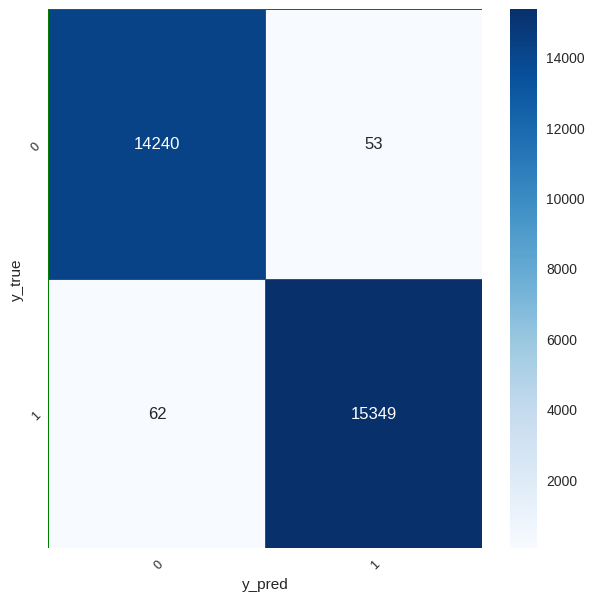

In [ ]:
visualize(rf, y_predict_rf, y_test)

In [ ]:
#  k-Nearest Neighbors (kNN) training and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
knn_score=knn.score(X_test,y_test)
y_predict_prob_knn = knn.predict_proba(X_test)
distances, indices = knn.kneighbors(X_test)
# pd.DataFrame(y_predict_knn).to_csv('/content/gdrive/MyDrive/ISO-IDS/KDD/Output/y_predict_knn.csv')

Accuracy of KNeighborsClassifier(n_neighbors=3): 0.9897656881228117
Precision of KNeighborsClassifier(n_neighbors=3): 0.9897715864377764
Recall of KNeighborsClassifier(n_neighbors=3): 0.9897656881228117
F1-score of KNeighborsClassifier(n_neighbors=3): 0.9897662608494797
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14293
         1.0       1.00      1.00      1.00     15411

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704



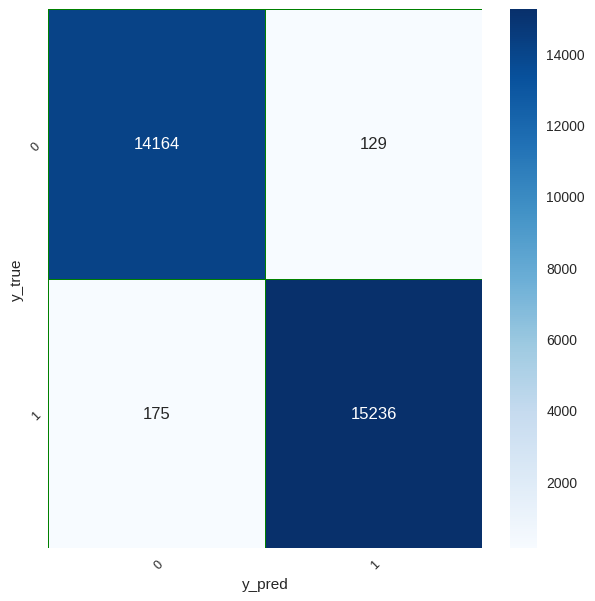

In [ ]:
visualize(knn, y_predict_knn, y_test)

# New Section

Aggregation of Classifiers based on ISO 27001

### ISO

In [ ]:
y_final = []

for i in range(len(y_predict_rf)):
  t = (y_predict_knn[i], y_predict_rf[i])
  i = np.nonzero(t)
  y_final.append(t[i[0][0]] if len(i[0]) > 0 else 0)
y_final = np.array(y_final)

ac=len(np.array(y_final)[np.array(y_final == y_test).astype(bool)])/len(y_final)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_final, average='weighted')
print(f'{ac*100:.2f}%')

99.37%


In [ ]:
y_final = []

for i in range(len(y_predict_rf)):
  if y_predict_knn[i] == 1 or y_predict_rf[i] == 1:
    y_final.append(1)
  else:
    y_final.append(y_predict_knn[i])
y_final = np.array(y_final)

ac=len(np.array(y_final)[np.array(y_final == y_test).astype(bool)])/len(y_final)
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_final, average='weighted')
print(f'{ac*100:.2f}%')

99.37%


In [ ]:
a1 = len([a for a in zip(y_final, y_test) if a[1] == 1])
a1

15411

In [ ]:
a2 = len([a for a in zip(y_final, y_test) if a[0] == 0 and a[1] == 1])
a2

38

In [ ]:
a2/a1*100

0.2465771202387905

In [ ]:
error = len([p[0] for p in zip(y_predict_knn, y_predict_rf, y_test) if p[0] != p[2] and p[1] != p[2] and p[2] == 1])
# knn_w = len([p[0] for p in zip(y_predict_knn, y_predict_rf, y_test) if p[0] != p[2] and p[2] == 1]) / a * 100
# rf_w  = len([p[0] for p in zip(y_predict_knn, y_predict_rf, y_test) if p[1] != p[2] and p[2] == 1]) / a * 100
y_w   = len([p[0] for p in zip(y_final, y_test) if p[0] != p[1] and p[1] == 1]) / a * 100
print(y_w)

0.24512966068894337


Accuracy of proposed method: 0.9937382170751414
Precision of proposed method: 0.9937636070043928
Recall of proposed method: 0.9937382170751414
F1-score of proposed method: 0.9937372567858759


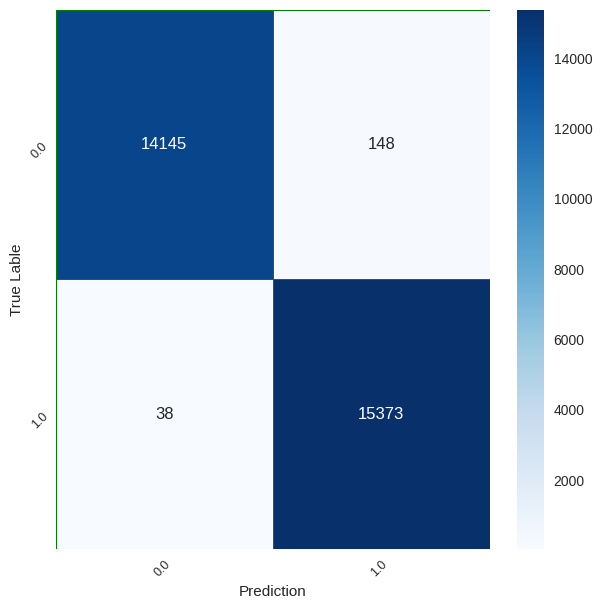

In [ ]:
from functools import cmp_to_key
# I corrected the print instractions
print('Accuracy of proposed method: '+ (str(ac)))
print('Precision of proposed method: '+ (str(precision)))
print('Recall of proposed method: '+ (str(recall)))
print('F1-score of proposed method: '+ (str(fscore)))

# Same as before without any modifications
# y_dec = label_decoder(y, labelencoder_label)
y_dec = y_final
cm = confusion_matrix(y_test, y_dec)
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="green",fmt=".0f",ax=ax, cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("True Lable")


ax.tick_params(axis='both', which='major', labelsize=9)
ax.xaxis.set_ticklabels(np.unique(y_test));
ax.yaxis.set_ticklabels(np.unique(y_dec));

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()